In [99]:
import numpy as np
import uncertainties.unumpy as unp
import matplotlib.pyplot as plt
import uncertainties
from uncertainties import ufloat
from scipy import optimize
import scipy.odr as odr
from scipy.optimize import curve_fit
from PIL import Image

In [100]:
#function to load the images
def png_to_array(png_path):
    """
    Liest ein PNG-Bild mit Grauwerten ein und gibt es als NumPy-Array zurück.
    
    :param png_path: Pfad zum PNG-Bild
    :return: 2D-NumPy-Array (Graustufen)
    """
    with Image.open(png_path) as img:
        img = img.convert('L')  # 'L' steht für 8-bit Graustufen
        array = np.array(img)
    return array

def normalize_image(img):
    img = img.astype(np.float32)
    return (img - np.min(img)) / (np.max(img) - np.min(img))

In [101]:
# calculate the Efficiency for all 
wavelengths = [550, 560, 570, 580, 590, 600, 610, 620, 630, 640, 650]
Eff = []

for i in wavelengths:
    zero_order = png_to_array(f"/Users/jan-niklastopf/Studium/7.Semester/Coding/Nanotechnology/Report/Pictures/center_{i}nm.png")
    hologram = png_to_array(f"/Users/jan-niklastopf/Studium/7.Semester/Coding/Nanotechnology/Report/Pictures/image_{i}nm.png")

    sum_zero_order = np.sum(normalize_image(zero_order))
    sum_hologram = np.sum(normalize_image(hologram))

    effiziency = sum_hologram/sum_zero_order

    Eff.append(effiziency)

print(wavelengths)
print(Eff)

values_hologram2 = []
for j in wavelengths:
    hologram2 = png_to_array(f"/Users/jan-niklastopf/Studium/7.Semester/Coding/Nanotechnology/Report/Pictures/image_{j}nm.png")

    sum_hologram2 = np.sum(normalize_image(hologram2))

    values_hologram2.append(sum_hologram2)





[550, 560, 570, 580, 590, 600, 610, 620, 630, 640, 650]
[0.76026344, 0.7090654, 0.74406403, 0.7372235, 0.7684983, 0.924188, 0.9329134, 1.0134714, 1.005608, 1.091439, 1.0773107]


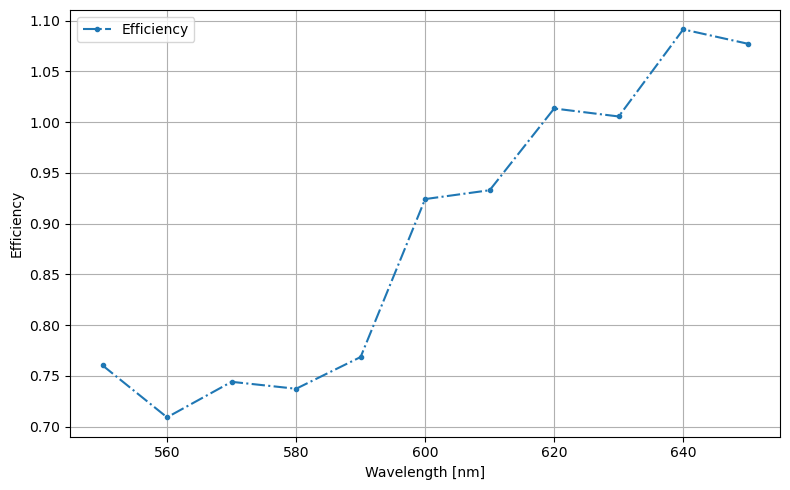

In [102]:
# Plot the results
plt.figure(figsize=(8, 5))
plt.plot(wavelengths, Eff, '.-.', label="Efficiency")
plt.xlabel("Wavelength [nm]")
plt.ylabel("Efficiency")
plt.legend()
plt.grid()
plt.tight_layout()
plt.show()

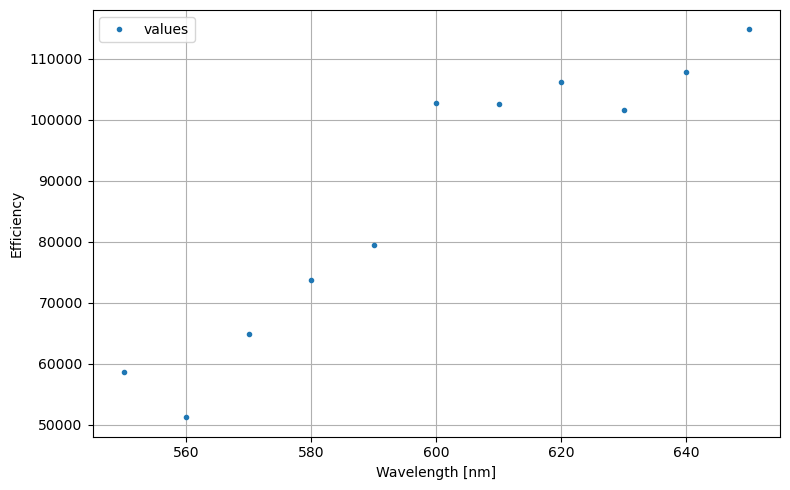

In [103]:
# Plot the results
plt.figure(figsize=(8, 5))
plt.plot(wavelengths, values_hologram2, ".", label = "intensity values")
plt.xlabel("Wavelength [nm]")
plt.ylabel("intensity values")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()